# KELOMPOK 2

HASAN ADE MUHARNOV
HASBI YUDDIN MATONDANG
HELEN K SINURAT
YUNDA ANDRIYANI
HILDA AYU TAMARA

In [1]:
import tweepy
import pandas as pd
import numpy as np  
from tweepy import Cursor
import csv
from textblob import TextBlob
import re
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
consumer_key = '0oQfX6LQfSR2Sj5YpwOlTOZsW'
consumer_secret = 'HfUxGwaveQoHr6NeBq4ViZeX7xKZOBBDbBeD8yB36VZbWsf5Jm'
access_token = '905245651-vi4SrkwLgBGgTqYyWnyPTy71w6GDYOuSf9sOAPW5'
access_secret = 'JzL5RzFcmi3ciad7BfDYagGhXuA3FUF6GMTQKyI7azlJS'

def connect_to_twitter_OAuth(): # a function
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth) # melakukan koneksi dengan menggunakan variabel api
    return api

api = connect_to_twitter_OAuth()

In [3]:
csvFile = open('tweet-cnn.csv', 'a') # 'a' for append utk menambahkan, bisa juga 'w' for write (file lama akan ditimpa)
csvWriter = csv.writer(csvFile)

for tweet in Cursor(api.user_timeline, screen_name='cnn').items(1000):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [33]:
#Fungsi untuk melakukan sentimen analis dengan library TextBlob
def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    analysis = analysis.correct()
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [34]:
#Fungsi untuk membuat Diagram Pie
def showPieChart(positive,neutral,negative):
    labels = 'Positive', 'Neutral', 'Negative'
    color = ['lightgreen','lightgray','orange']
    value = [positive, neutral, negative]
    explode = (0.1, 0.1, 0.1)
    plt.pie(value,autopct='%1.1f%%',colors=color, labels=labels , shadow= True,explode = explode , startangle=140)
    plt.show()

In [35]:
df = pd.read_csv("tweet-cnn.csv", header=None)
df.columns = ['created_at', 'tweet']
df.head()

,created_at,tweet
0,2019-08-26 21:21:03,b'Men and women with the highest levels of opt...
1,2019-08-26 21:19:31,b'GOP presidential candidate Joe Walsh says he...
2,2019-08-26 21:14:51,b'Tropical Storm Dorian has intensified in the...
3,2019-08-26 21:11:19,b'Ashleigh Barty and Karolina Pliskova survive...
4,2019-08-26 21:11:07,b'California Attorney General Xavier Becerra a...


In [36]:
df.drop_duplicates(subset="tweet", keep = False, inplace = True)

In [37]:
df['tweet'].head()

0    b'Men and women with the highest levels of opt...
1    b'GOP presidential candidate Joe Walsh says he...
2    b'Tropical Storm Dorian has intensified in the...
3    b'Ashleigh Barty and Karolina Pliskova survive...
4    b'California Attorney General Xavier Becerra a...
Name: tweet, dtype: object

In [38]:
rm_b = [] #menyimpa tweet yg telah dihapus karakter 'b''
for tweet in df["tweet"]:
    rm_b.append(tweet[2:len(df["tweet"])-1])

In [39]:
df['tweet']=rm_b
df['tweet'].head()

0    Men and women with the highest levels of optim...
1    GOP presidential candidate Joe Walsh says he r...
2    Tropical Storm Dorian has intensified in the A...
3    Ashleigh Barty and Karolina Pliskova survived ...
4    California Attorney General Xavier Becerra and...
Name: tweet, dtype: object

In [40]:
import re
import preprocessor as p
#from string import punctuation

rm_regex = []
i=0
for tweet in df['tweet']:
    tweet = re.sub(r'((\\x[a-z0-9]{1,}){1,})', '', tweet)
    tweet = re.sub(r"http\S+", '', tweet)
    tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','', tweet)
    tweet = p.clean(tweet)
    rm_regex.insert(i, tweet)
    i+=1

In [41]:
df['tweet']=rm_regex
df['tweet'].head()

0    Men and women with the highest levels of optim...
1    GOP presidential candidate Joe Walsh says he r...
2    Tropical Storm Dorian has intensified in the A...
3    Ashleigh Barty and Karolina Pliskova survived ...
4    California Attorney General Xavier Becerra and...
Name: tweet, dtype: object

In [42]:
df['tweet'] = [word.lower() for word in df['tweet']]

In [ ]:
df['SA'] = np.array([analize_sentiment(tweet) for tweet in df['tweet']])

In [45]:
df.head()

,created_at,tweet,SA
0,2019-08-26 21:21:03,men and women with the highest levels of optim...,-1
1,2019-08-26 21:19:31,gop presidential candidate joe walsh says he r...,-1
2,2019-08-26 21:14:51,tropical storm dorian has intensified in the a...,0
3,2019-08-26 21:11:19,ashleigh barty and karolina pliskova survived ...,0
4,2019-08-26 21:11:07,california attorney general xavier becerra and...,-1


In [46]:
df = df.replace("",np.nan)
df.dropna(subset = ["tweet"], axis=0, inplace=True) #axis=0 berarti menghapus row, axis=1 menghapus column

In [47]:
df.head()

,created_at,tweet,SA
0,2019-08-26 21:21:03,men and women with the highest levels of optim...,-1
1,2019-08-26 21:19:31,gop presidential candidate joe walsh says he r...,-1
2,2019-08-26 21:14:51,tropical storm dorian has intensified in the a...,0
3,2019-08-26 21:11:19,ashleigh barty and karolina pliskova survived ...,0
4,2019-08-26 21:11:07,california attorney general xavier becerra and...,-1


In [48]:
pos_tweets = 0
neu_tweets = 0
neg_tweets = 0

for sa in df['SA']:
    if sa == 1:
        pos_tweets+=1
    elif sa == 0:
        neu_tweets+=1
    else:
        neg_tweets+=1

In [49]:
percent_pos = pos_tweets*100/len(df['tweet'])
percent_neu = neu_tweets*100/len(df['tweet'])
percent_neg = neg_tweets*100/len(df['tweet'])

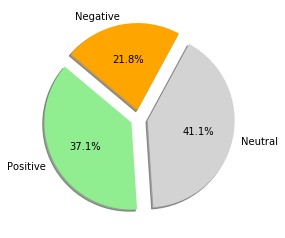

In [50]:
#Menampilkan diagram pie
showPieChart(positive=percent_pos,neutral=percent_neu,negative=percent_neg)

In [51]:
save = df.to_csv("tweet-cnn-senti.csv")

In [52]:
df = df[['tweet','SA']]

In [53]:
len(df)

996

In [54]:
train_data = df[0:800].values

In [55]:
train_data

array([['men and women with the highest levels of optimism had an to longer life span on average than those who prac',
        -1],
       ['gop presidential candidate joe walsh says he regrets calling president obama a muslim i engaged in this hateful p',
        -1],
       ['tropical storm dorian has intensified in the atlantic ocean whipping mph winds and could become a hurricane',
        0],
       ...,
       ['the trump administration has announced plans that could hold undocumented families detained together indefinitely',
        0],
       ['what do you want to know about the economy as recession fears loom ask a question here and one of cnn reporters',
        0],
       ['larry king is seeking to end his marriage to his seventh wife',
        0]], dtype=object)

In [56]:
test_data = df[801:996].values

In [57]:
test_data

array([['no instagram is not using your photos against you', 0],
       ['former white house press secretary sean spicer is joining the cast of abcs dancing with the stars',
        0],
       ['breathtaking new video provided exclusively to cnn shows coral from the atlantic ocean spawning in a laboratory env',
        1],
       ['more than two dozen people have been arrested over threats to commit mass shootings since people were killed in',
        1],
       ['from high fashion to the high life americas first big name fashion designer halston was ahead of his time hals',
        1],
       ['a man was mauled to death by his own captive lions as he attempted to fix a broken fence in the enclosure at a game',
        0],
       ['environmental activists warn that if the amazon reaches a point of no return the rainforest could become a dry sav',
        -1],
       ['a sustained effort from nra officials republican lawmakers and conservative allies helped cement president trumps',
   

In [58]:
from textblob.classifiers import NaiveBayesClassifier

In [59]:
classifier = NaiveBayesClassifier(train_data)

In [60]:
classifier.accuracy(test_data)

0.6461538461538462

In [61]:
classifier.show_informative_features(3)

Most Informative Features
          contains(down) = True               -1 : 1      =     22.7 : 1.0
         contains(least) = True               -1 : 1      =     16.8 : 1.0
        contains(amazon) = True               -1 : 1      =     14.3 : 1.0
